In [17]:
import tensorflow as tf
keras = tf.keras
from keras import Sequential, Input
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from keras.utils import plot_model
import os

In [18]:
horse = []
zebra = []
for fname in os.listdir('./horse2zebra/train/trainA'):
    img = load_img(f'./horse2zebra/train/trainA/{fname}')
    horse.append(img_to_array(img))
for fname in os.listdir('./horse2zebra/train/trainB'):
    img = load_img(f'./horse2zebra/train/trainB/{fname}')
    zebra.append(img_to_array(img))

horse, zebra

([array([[[161., 156., 178.],
          [161., 156., 178.],
          [161., 156., 178.],
          ...,
          [117., 112.,  83.],
          [117., 111.,  89.],
          [118., 111.,  93.]],
  
         [[161., 157., 180.],
          [160., 156., 179.],
          [158., 154., 177.],
          ...,
          [115., 110.,  81.],
          [116., 110.,  86.],
          [117., 110.,  91.]],
  
         [[158., 155., 182.],
          [156., 153., 180.],
          [154., 151., 178.],
          ...,
          [115., 110.,  80.],
          [116., 110.,  84.],
          [117., 111.,  87.]],
  
         ...,
  
         [[170., 155., 160.],
          [184., 168., 171.],
          [181., 163., 163.],
          ...,
          [148., 136., 148.],
          [145., 136., 141.],
          [145., 137., 135.]],
  
         [[176., 161., 168.],
          [184., 168., 171.],
          [184., 166., 166.],
          ...,
          [151., 139., 151.],
          [153., 144., 149.],
          [157., 149.,

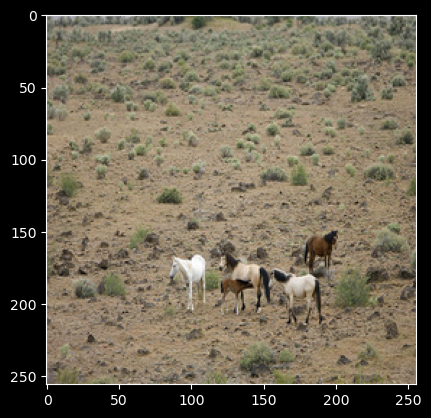

In [19]:
plt.imshow(plt.imread('horse2zebra/train/trainA/n02381460_2.jpg'))

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
base_dir = './horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_horse_dir = os.path.join(train_dir, 'trainA')
train_zebra_dir = os.path.join(train_dir, 'trainB')
validation_horse_dir = os.path.join(validation_dir, 'valA')
validation_zebra_dir = os.path.join(validation_dir, 'valB')
test_horse_dir = os.path.join(test_dir, 'testA')
test_zebra_dir = os.path.join(test_dir, 'testB')

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 2101 images belonging to 2 classes.


In [23]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 300 images belonging to 2 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 260 images belonging to 2 classes.


In [25]:
lenet_model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(6, (5, 5), padding="same", activation="tanh"),
    AveragePooling2D(strides=2),
    Conv2D(16, (5, 5), padding="valid", activation="tanh"),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(120, activation="sigmoid"),
    Dense(84, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="LeNet")
lenet_model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               48120 

In [26]:
lenet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [27]:
lenet_hist = lenet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


2023-08-26 22:14:49.719804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-26 22:14:50.341346: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:14:50.855660: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faac00671f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-26 22:14:50.855799: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-26 22:14:50.909224: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-26 22:14:51.477414: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:14:51.607507: I ./tensorflow/compiler/jit/device_

106/106 [==============================] - 28s 215ms/step - loss: 0.6628 - acc: 0.6030 - val_loss: 0.6666 - val_acc: 0.6667
Epoch 2/20
106/106 [==============================] - 23s 213ms/step - loss: 0.5918 - acc: 0.7049 - val_loss: 0.6105 - val_acc: 0.7033
Epoch 3/20
106/106 [==============================] - 23s 212ms/step - loss: 0.5581 - acc: 0.7344 - val_loss: 0.5697 - val_acc: 0.7467
Epoch 4/20
106/106 [==============================] - 21s 198ms/step - loss: 0.5326 - acc: 0.7520 - val_loss: 0.5739 - val_acc: 0.7233
Epoch 5/20
106/106 [==============================] - 21s 200ms/step - loss: 0.5180 - acc: 0.7611 - val_loss: 0.5733 - val_acc: 0.7200
Epoch 6/20
106/106 [==============================] - 22s 206ms/step - loss: 0.5053 - acc: 0.7558 - val_loss: 0.5449 - val_acc: 0.7533
Epoch 7/20
106/106 [==============================] - 22s 210ms/step - loss: 0.4957 - acc: 0.7692 - val_loss: 0.6046 - val_acc: 0.6767
Epoch 8/20
106/106 [==============================] - 24s 230ms/st

In [28]:
lenet_model.evaluate(test_generator, batch_size=32)

13/13 [==============================] - 4s 319ms/step - loss: 0.4200 - acc: 0.8038


[0.4199732542037964, 0.8038461804389954]

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 2101 images belonging to 2 classes.


In [30]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 300 images belonging to 2 classes.


In [31]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 260 images belonging to 2 classes.


In [32]:
alexnet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=(4, 4), padding="valid", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(256, (3, 3), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Flatten(),
    Dense(4096, activation="sigmoid"),
    Dense(4096, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="AlexNet")
alexnet_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       1327

In [33]:
alexnet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [34]:
alexnet_hist = alexnet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
106/106 [==============================] - 34s 268ms/step - loss: 1.0002 - acc: 0.5079 - val_loss: 0.9256 - val_acc: 0.5000
Epoch 2/20
106/106 [==============================] - 24s 223ms/step - loss: 0.8018 - acc: 0.5140 - val_loss: 0.7061 - val_acc: 0.5000
Epoch 3/20
106/106 [==============================] - 24s 227ms/step - loss: 0.7187 - acc: 0.5388 - val_loss: 0.7098 - val_acc: 0.5000
Epoch 4/20
106/106 [==============================] - 25s 234ms/step - loss: 0.7109 - acc: 0.5264 - val_loss: 0.7920 - val_acc: 0.5000
Epoch 5/20
106/106 [==============================] - 23s 219ms/step - loss: 0.7365 - acc: 0.5331 - val_loss: 0.8013 - val_acc: 0.5000
Epoch 6/20
106/106 [==============================] - 26s 246ms/step - loss: 0.7036 - acc: 0.5340 - val_loss: 0.7572 - val_acc: 0.5000
Epoch 7/20
106/106 [==============================] - 25s 236ms/step - loss: 0.7066 - acc: 0.5474 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 8/20
106/106 [==============================] - 2

In [35]:
alexnet_model.evaluate(test_generator)

13/13 [==============================] - 3s 184ms/step - loss: 0.6913 - acc: 0.5385


[0.6913493275642395, 0.5384615659713745]